In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Encoder

In [ ]:
# Load from wandb
from utils import load_wandb
encoder_training_info = load_wandb('encoder_scalinglaws' )

run name =  encoder_3M_16B  id:  ipumpm2t
run name =  encoder_1M_16B  id:  qqd9wk0s
run name =  encoder_300K_16B  id:  ibx18bb0
run name =  encoder_100K_16B  id:  hhfdbp7g
run name =  encoder_10K_16B  id:  4zkde3gf
run name =  encoder_1K_16B  id:  8oq122e8
run name =  encoder_10M_16B  id:  axixjfkv
run name =  encoder_30M_16B  id:  vltz3o7d
run name =  encoder_100M_16B  id:  h5blrpse
run name =  encoder_300M_16B  id:  bknr6g5f
run name =  encoder_1B_1B  id:  qa6bnw1y
run name =  encoder_1B_100M  id:  nwv77o62


wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=19 sec). Create a new API with an integer timeout larger than 19, e.g., `api = wandb.Api(timeout=29)` to increase the graphql timeout.


run name =  encoder_1B_10M  id:  bwsv1nf8
run name =  encoder_1B_16B  id:  k61jo91o


In [7]:
np.save('encoder_training_info.npz', encoder_training_info)

In [2]:
# Load from local file
encoder_training_info = np.load('encoder_training_info.npy', allow_pickle=True).item()

In [3]:
from utils import fit_powerlaw
from utils import MODELSIZE2PARAM

def select_min_topk(data, k=10):
    return np.mean(np.sort(data)[:k])

def plot_modelsize_vs_metric(
    info,
    model_base,
    metric,
    dataset_list,
    color_list,
    sizes=["1K", "10K", "100K", "300K", "1M", "3M", "10M", "30M", "100M", "300M"],
    postprocess=np.min,
    stride=None,
    fit=True,
    figsize=(8, 6),
    ylabel=None,
    minbias=0,
):

    fig, ax = plt.subplots(figsize=figsize, dpi=100)
    ax.set_xscale("log")

    minys = []
    maxys = []
    lines = []
    labels = []
    for dataset, colors in zip(dataset_list, color_list):

        xs = []
        ys = []
        for size in sizes:
            model_name = f"{model_base}_{size}_16B"
            if model_name not in info.keys():
                continue
            x = MODELSIZE2PARAM[size]
            y = info[model_name][dataset][metric][:, 1]
            y = postprocess(y)
            xs.append(x)
            ys.append(y)

        xs = np.array(xs)
        ys = np.array(ys)
        logys = np.log10(ys)

        ax.scatter(xs, logys, marker="o", c=colors[0], s=150)

        if fit:
            xs_ = xs
            ys_ = ys
            logys_fit, label = fit_powerlaw(xs_, ys_, signal="N")

            if dataset == "lsf":
                prefix = r"OOD-LSF: "
            elif dataset == "monash":
                prefix = r"OOD-Monash: "
            else:
                prefix = r"ID: "

            (line,) = ax.plot(
                xs_,
                logys_fit,
                c=colors[1],
                linestyle="--",
                label=prefix + label,
                linewidth=4,
            )
            lines.append(line)
            labels.append(label)

        minys.append(np.min(ys))
        maxys.append(np.max(ys))

    miny, maxy = min(minys), max(maxys)
    if stride is None:
        if maxy - miny < 0.5:
            stride = 0.1
        elif maxy - miny < 1:
            stride = 0.2
        elif maxy - miny < 10:
            stride = 1
        elif maxy - miny < 100:
            stride = 10
        elif maxy - miny < 1000:
            stride = 100
        else:
            stride = 1000

    yticks = np.arange(miny - minbias, maxy + stride, stride)
    ax.set_yticks(np.log10(yticks), [f"{yt:.1f}" for yt in yticks])

    ax.set_xlabel("Model Size")

    ylabel = metric if ylabel is None else ylabel
    ax.set_ylabel(ylabel)

    ax.legend(loc="lower left", borderaxespad=0.1, ncol=1, frameon=True)

    ax.grid(which="both", axis="y", linestyle="--", linewidth=0.5)
    for xtick in [10**i for i in range(4, 9)]:
        ax.axvline(x=xtick, color="gray", linestyle="--", linewidth=0.5)

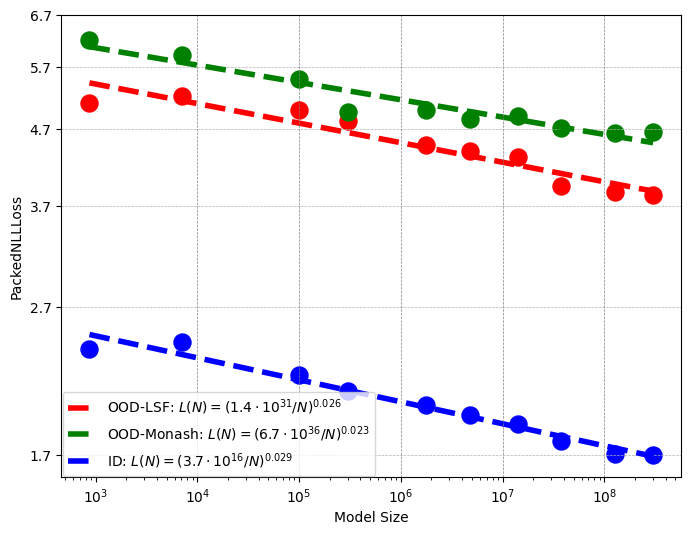

In [4]:
plot_modelsize_vs_metric(
    encoder_training_info,
    'encoder',
    'PackedNLLLoss',
    ['lsf', 'monash', 'val'],
    [['red', 'red'], ['green', 'green'], ['blue', 'blue']],
    postprocess=np.min,
)

# Decoder

In [2]:
from utils import load_wandb
decoder_training_info = load_wandb('decoder_scalinglaws')

run name =  decoder_3M_16B  id:  zhcivdl5
run name =  decoder_1M_16B  id:  1dmbr0f9
run name =  decoder_300K_16B  id:  ktu7f471
run name =  decoder_100K_16B  id:  6n04xxvq
run name =  decoder_10K_16B  id:  ufixuvc0
run name =  decoder_1K_16B  id:  ezzna1ay
run name =  decoder_10M_16B  id:  t1d26inw
run name =  decoder_1B_1B  id:  l6qp2lgk
run name =  decoder_1B_100M  id:  1oj005kg
run name =  decoder_1B_10M  id:  r81or9hw
run name =  decoder_1B_16B  id:  0z1ruz65
run name =  decoder_300M_16B  id:  3fz87lvv
run name =  decoder_30M_16B  id:  6whz6ijl
run name =  decoder_100M_16B  id:  d3vt3xdv
run name =  decoder_1B_5B  id:  9y03cdic
run name =  decoder_100M_256BS  id:  iakjlqam
run name =  decoder_100M_512BS  id:  br2rsn1z


In [ ]:
np.save('decoder_training_info', decoder_training_info)

In [6]:
decoder_training_info = np.load('decoder_training_info.npy', allow_pickle=True).item()

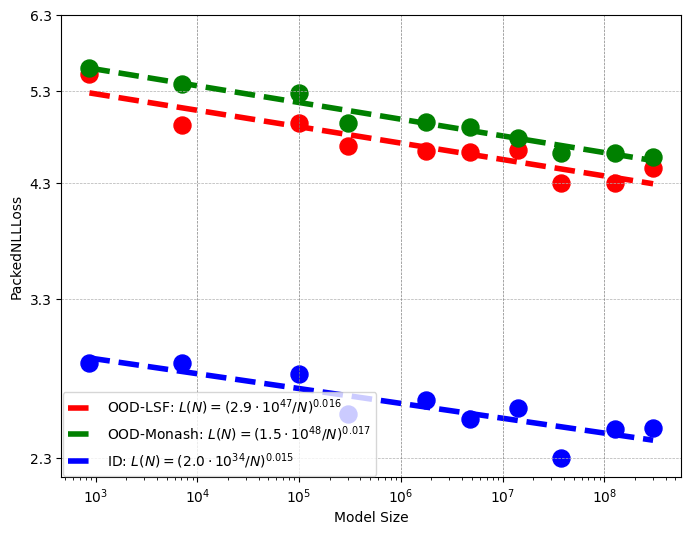

In [7]:
plot_modelsize_vs_metric(
    decoder_training_info,
    'decoder',
    'PackedNLLLoss',
    ['lsf', 'monash', 'val'],
    [['red', 'red'], ['green', 'green'], ['blue', 'blue']],
    postprocess=np.min,
)